In [1]:
import pandas as pd

In [9]:
dat=pd.read_csv('/home/maria/MouseBox/selected_data/models/gpu_working/video_preds/session_view.csv')

In [10]:
dat

,scorer,heatmap_tracker,heatmap_tracker.1,heatmap_tracker.2,heatmap_tracker.3,heatmap_tracker.4,heatmap_tracker.5,heatmap_tracker.6,heatmap_tracker.7,heatmap_tracker.8
0,bodyparts,Head,Head,Head,LeftPaw,LeftPaw,LeftPaw,Back,Back,Back
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,958.7149047851562,600.882568359375,0.0004063136875629425,1010.720947265625,602.7427978515625,0.0004268894554115832,1035.5001220703125,597.6326904296875,0.00036899096448905766
3,1,958.7264404296875,600.9052124023438,0.0004062047810293734,1010.570556640625,602.7130126953125,0.0004278650740161538,1035.6351318359375,597.6849365234375,0.00037014487315900624
4,2,958.74365234375,600.9296264648438,0.0004062584484927356,1010.2406616210938,602.5645751953125,0.0004272147489245981,1035.1522216796875,597.4904174804688,0.00036919733975082636
...,...,...,...,...,...,...,...,...,...,...
897,895,1018.040771484375,614.267333984375,0.00033138308208435774,1351.31494140625,709.451171875,0.834865152835846,1439.455078125,430.99517822265625,0.9960752129554749
898,896,1000.4690551757812,610.0468139648438,0.00035281258169561625,1355.6466064453125,706.33544921875,0.8087987899780273,1435.31005859375,428.8785095214844,0.9979462623596191
899,897,1045.7764892578125,619.712646484375,0.0003050211525987834,1356.560302734375,704.4111938476562,0.8314499258995056,1437.3851318359375,427.3961486816406,0.9984001517295837
900,898,1140.0416259765625,638.7076416015625,0.0003117653541266918,1354.6766357421875,703.0355834960938,0.923408031463623,1439.920654296875,425.2796325683594,0.9943515658378601


In [ ]:
import pandas as pd
import numpy as np

# assume your dataframe is called df
# df = pd.read_csv(...) or already loaded

# Extract metadata rows
bodyparts = dat.iloc[0, 1:].values
coords    = dat.iloc[1, 1:].values

# Build column names like Head_x, Head_y, LeftPaw_x, ...
columns = [f"{bp}_{c}" for bp, c in zip(bodyparts, coords)]

# Extract numeric data
X = dat.iloc[2:, 1:].astype(float)
X.columns = columns
X.reset_index(drop=True, inplace=True)

xy_cols = [c for c in X.columns if c.endswith("_x") or c.endswith("_y")]
X_xy = X[xy_cols]

X_xy


,Head_x,Head_y,LeftPaw_x,LeftPaw_y,Back_x,Back_y
0,958.714905,600.882568,1010.720947,602.742798,1035.500122,597.632690
1,958.726440,600.905212,1010.570557,602.713013,1035.635132,597.684937
2,958.743652,600.929626,1010.240662,602.564575,1035.152222,597.490417
3,958.791138,600.915527,1010.103821,602.611755,1034.718750,597.583923
4,958.782043,600.907471,1010.172791,602.662598,1034.931885,597.647156
...,...,...,...,...,...,...
895,1018.040771,614.267334,1351.314941,709.451172,1439.455078,430.995178
896,1000.469055,610.046814,1355.646606,706.335449,1435.310059,428.878510
897,1045.776489,619.712646,1356.560303,704.411194,1437.385132,427.396149
898,1140.041626,638.707642,1354.676636,703.035583,1439.920654,425.279633


In [21]:
X_xy.dropna()

,Head_x,Head_y,LeftPaw_x,LeftPaw_y,Back_x,Back_y
0,958.714905,600.882568,1010.720947,602.742798,1035.500122,597.632690
1,958.726440,600.905212,1010.570557,602.713013,1035.635132,597.684937
2,958.743652,600.929626,1010.240662,602.564575,1035.152222,597.490417
3,958.791138,600.915527,1010.103821,602.611755,1034.718750,597.583923
4,958.782043,600.907471,1010.172791,602.662598,1034.931885,597.647156
...,...,...,...,...,...,...
895,1018.040771,614.267334,1351.314941,709.451172,1439.455078,430.995178
896,1000.469055,610.046814,1355.646606,706.335449,1435.310059,428.878510
897,1045.776489,619.712646,1356.560303,704.411194,1437.385132,427.396149
898,1140.041626,638.707642,1354.676636,703.035583,1439.920654,425.279633


Explained variance: [0.49987374 0.31003363 0.07220551]


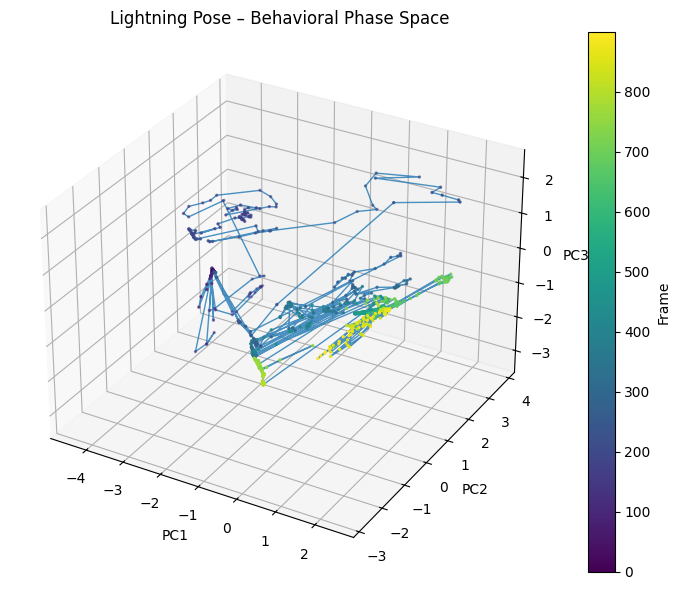

In [16]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_xy)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
Z = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(
    Z[:, 0],
    Z[:, 1],
    Z[:, 2],
    lw=1,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Lightning Pose – Behavioral Phase Space")
t = np.arange(len(Z))

sc = ax.scatter(
    Z[:, 0], Z[:, 1], Z[:, 2],
    c=t, cmap="viridis", s=2
)
plt.colorbar(sc, label="Frame")
plt.tight_layout()
plt.show()




In [14]:
t = np.arange(len(Z))

sc = ax.scatter(
    Z[:, 0], Z[:, 1], Z[:, 2],
    c=t, cmap="viridis", s=2
)
plt.colorbar(sc, label="Frame")


/tmp/ipykernel_280267/3839359684.py:7: UserWarning: Adding colorbar to a different Figure <Figure size 800x600 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(sc, label="Frame")


<Figure size 640x480 with 0 Axes>

In [8]:
dat

,scorer,heatmap_tracker,heatmap_tracker.1,heatmap_tracker.2,heatmap_tracker.3,heatmap_tracker.4,heatmap_tracker.5,heatmap_tracker.6,heatmap_tracker.7,heatmap_tracker.8,set
0,bodyparts,Head,Head,Head,LeftPaw,LeftPaw,LeftPaw,Back,Back,Back,NaN
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,NaN
2,labeled-data/session_view/img00000275.jpg,1166.0152587890625,741.36376953125,0.9999396204948425,1271.998046875,819.7116088867188,0.913101315498352,1575.6925048828125,585.0758056640625,0.9957818984985352,train
3,labeled-data/session_view/img00000817.jpg,1238.9991455078125,635.3472900390625,0.999356746673584,1366.8514404296875,745.6630249023438,0.9982677698135376,1614.0311279296875,481.661865234375,0.9970149993896484,train
4,labeled-data/session_view/img00000212.jpg,1013.6107788085938,757.4309692382812,0.526229739189148,985.8922729492188,694.5443115234375,0.00016858064918778837,646.9622192382812,583.3821411132812,0.9992625117301941,train
5,labeled-data/session_view/img00000401.jpg,1162.647216796875,588.4359741210938,0.9999295473098755,1247.4398193359375,698.520751953125,0.9989047646522522,1629.1280517578125,582.9354248046875,0.9983842372894287,train
6,labeled-data/session_view/img00000238.jpg,956.8121337890625,600.4390869140625,0.00040876364801079035,1342.393798828125,598.1594848632812,0.0002033051277976483,1625.770263671875,587.2667236328125,0.9974600076675415,train
7,labeled-data/session_view/img00000685.jpg,1361.203857421875,895.8435668945312,0.9999988079071045,1404.4227294921875,895.1640014648438,0.9999191164970398,1530.3365478515625,505.3359069824219,0.9970635175704956,train
8,labeled-data/session_view/img00000396.jpg,1004.9522094726562,777.0213012695312,0.9977990984916687,1110.8038330078125,628.5675659179688,0.0002647203509695828,1538.8265380859375,562.1195068359375,0.958366870880127,train
9,labeled-data/session_view/img00000113.jpg,327.6094970703125,884.9113159179688,0.9981247186660767,434.4012145996094,863.4029541015625,0.00014174054376780987,1015.0863037109375,605.999267578125,0.00037206386332400143,train


In [17]:
import numpy as np
from sklearn.cluster import KMeans

K = 8
km = KMeans(n_clusters=K, n_init="auto", random_state=0)
labels = km.fit_predict(Z)

# pick a representative frame per cluster (closest to centroid)
centroids = km.cluster_centers_
rep_frames = []
for k in range(K):
    idx = np.where(labels == k)[0]
    if len(idx) == 0:
        continue
    subZ = Z[idx]
    j = idx[np.argmin(np.linalg.norm(subZ - centroids[k], axis=1))]
    rep_frames.append(int(j))

print("Representative frames:", rep_frames)


Representative frames: [615, 170, 751, 121, 129, 693, 323, 437]


In [18]:
import subprocess
from pathlib import Path

video_path = "/home/maria/MouseBox/selected_data/2021-10-02_08-07-55_segment1_mouse80_lever_side-view copy.avi"
out_dir = Path("phase_space_clips")
out_dir.mkdir(exist_ok=True)

fps = 30
radius = 15  # frames on each side

for i, f in enumerate(rep_frames):
    start = max(0, f - radius) / fps
    duration = (2*radius + 1) / fps
    
    out_path = out_dir / f"cluster_{i:02d}_frame_{f:06d}.mp4"
    subprocess.run([
        "ffmpeg", "-y",
        "-ss", str(start),
        "-i", video_path,
        "-t", str(duration),
        "-c", "copy",
        str(out_path)
    ], check=False)

print("Saved clips to:", out_dir)


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

Saved clips to: phase_space_clips


Stream mapping:
  Stream #0:0 -> #0:0 (copy)
Press [q] to stop, [?] for help
[mp4 @ 0x62606d394b00] Timestamps are unset in a packet for stream 0. This is deprecated and will stop working in the future. Fix your code to set the timestamps properly
[mp4 @ 0x62606d394b00] pts has no value
    Last message repeated 86 times
[mp4 @ 0x62606d394b00] pts has no value
    Last message repeated 1 times
[out#0/mp4 @ 0x62606d264b80] video:787kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.148959%
size=     788kB time=00:00:01.00 bitrate=6454.3kbits/s speed= 666x    
ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enab

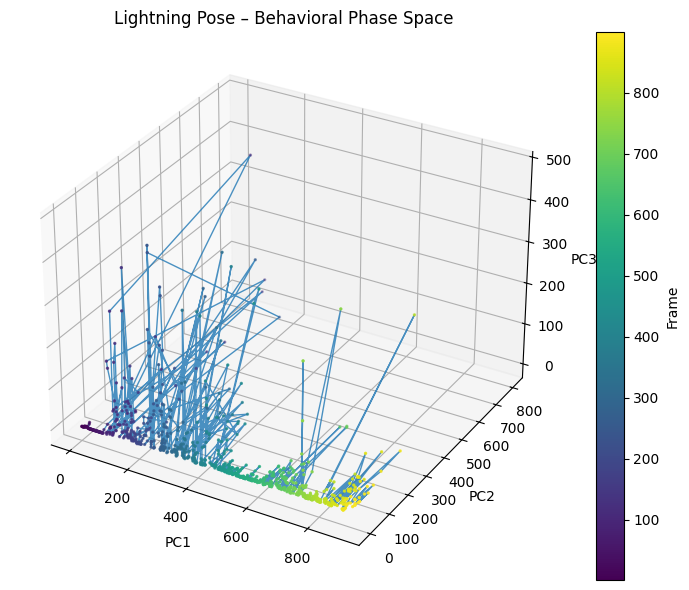

In [20]:
Z=np.array(pd.read_csv('/home/maria/MouseBox/notebooks/session_view_temporal_norm.csv'))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(
    Z[:, 0],
    Z[:, 1],
    Z[:, 2],
    lw=1,
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Lightning Pose – Behavioral Phase Space")
t = np.arange(len(Z))

sc = ax.scatter(
    Z[:, 0], Z[:, 1], Z[:, 2],
    c=t, cmap="viridis", s=2
)
plt.colorbar(sc, label="Frame")
plt.tight_layout()
plt.show()


